## Importing Required Libraries

In [3]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

## Assigning Path for Dataset

In [4]:
TRAIN_DIR = "D:/BANGKIT CAPSTONE/data - Copy (2)/train"
TEST_DIR = "D:/BANGKIT CAPSTONE/data - Copy (2)/test"
BATCH_SIZE=128


### Will see how many categories and images present

In [68]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 570 in folder angry
For training data, found 436 in folder disgust
For training data, found 581 in folder fear
For training data, found 501 in folder happy
For training data, found 505 in folder neutral
For training data, found 598 in folder sad
For training data, found 477 in folder surprise


In [69]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 312 in folder angry
For testing data, found 348 in folder disgust
For testing data, found 138 in folder fear
For testing data, found 105 in folder happy
For testing data, found 111 in folder neutral
For testing data, found 107 in folder sad
For testing data, found 112 in folder surprise


Will see some random images with their labels


In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [21]:
class_names = ['Angry','Disgust','Fear','Happy','neutral','Sad', 'Surprise']

Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)


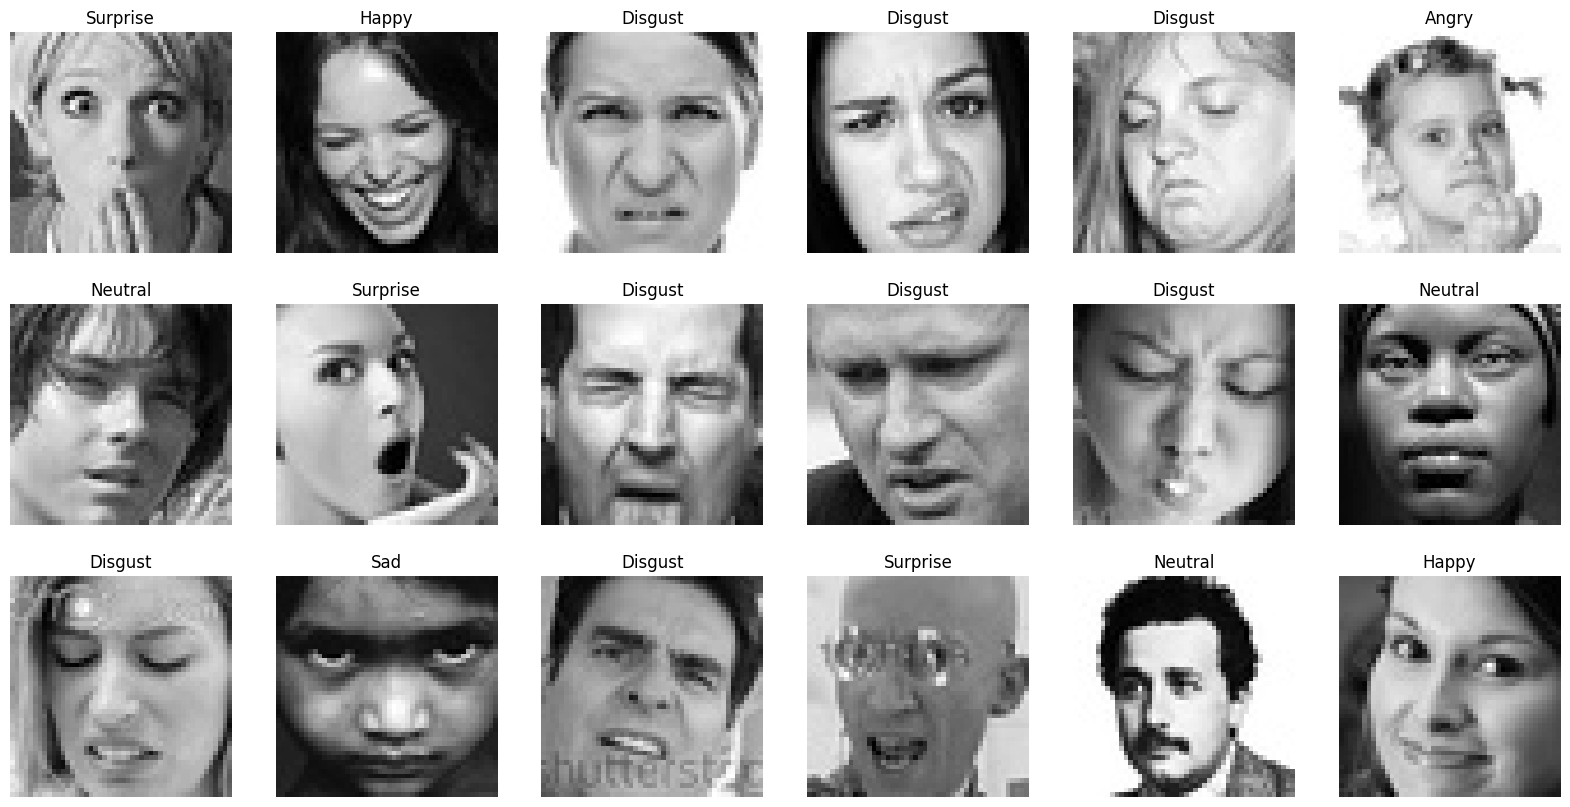

In [77]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="D:/BANGKIT CAPSTONE/data - Copy (2)/train/", target_class=class_name)
     # Display the image in grayscale
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Turn off axis labels

### Preparing data for training

In [78]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (48, 48),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (48, 48),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 3668 images belonging to 7 classes.
Found 1233 images belonging to 7 classes.


### Basic model building (CNN Classifier)

In [79]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (48, 48, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))

classifier.add(Dense(units = 7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [80]:
## model summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [59]:
# #Fitting Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("model_weights10.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

# reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
#                                         # factor=0.2,
#                                         factor=0.1,
#                                         #patience=3,
#                                         patience=3,
#                                         verbose=1,
#                                         min_delta=0.001)

callbacks_list = [checkpoint, early_stopping]


In [61]:
history = classifier.fit(training_set,
                         steps_per_epoch=training_set.n//training_set.batch_size,
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps=test_set.n//test_set.batch_size,
                         callbacks=callbacks_list)


classifier.save('model10.h5')  # creates a HDF5 file 'my_model.h5' 50 epoch

Epoch 1/50
179/179 [==============================] - ETA: 0s - loss: 0.1283 - accuracy: 0.9529
Epoch 1: val_accuracy did not improve from 0.90128
179/179 [==============================] - 55s 305ms/step - loss: 0.1283 - accuracy: 0.9529 - val_loss: 0.4344 - val_accuracy: 0.8722
Epoch 2/50
179/179 [==============================] - ETA: 0s - loss: 0.1177 - accuracy: 0.9578
Epoch 2: val_accuracy did not improve from 0.90128
179/179 [==============================] - 53s 298ms/step - loss: 0.1177 - accuracy: 0.9578 - val_loss: 0.3087 - val_accuracy: 0.8984
Epoch 3/50
179/179 [==============================] - ETA: 0s - loss: 0.1360 - accuracy: 0.9527
Epoch 3: val_accuracy did not improve from 0.90128
179/179 [==============================] - 60s 335ms/step - loss: 0.1360 - accuracy: 0.9527 - val_loss: 0.3005 - val_accuracy: 0.8970
Epoch 4/50
179/179 [==============================] - ETA: 0s - loss: 0.1248 - accuracy: 0.9541
Epoch 4: val_accuracy improved from 0.90128 to 0.90980, savin

### Evaluating the model

In [62]:
classifier.evaluate(test_set)

23/23 [==============================] - 3s 126ms/step - loss: 0.2509 - accuracy: 0.9117


[0.2509128451347351, 0.9116829037666321]

Text(0, 0.5, 'Loss')

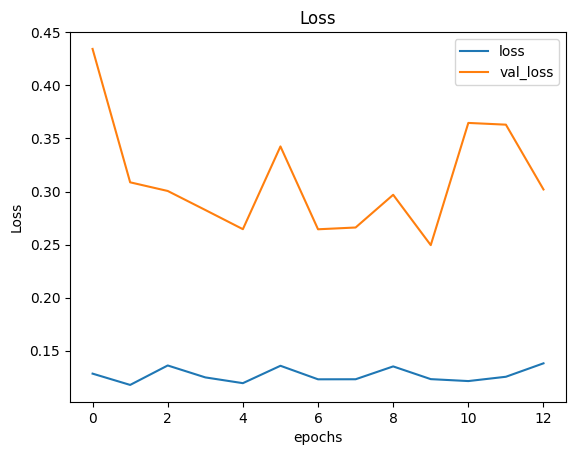

In [63]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

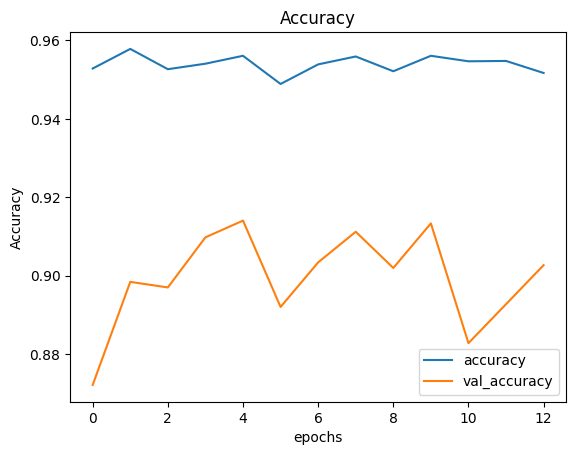

In [64]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [27]:
model_path = "model10.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("D:/BANGKIT CAPSTONE/Neutral Faces - Multicam.jpeg")

image_from_array = Image.fromarray(image, 'RGB')
resize_image = image_from_array.resize((48, 48))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 [==============================] - 0s 99ms/step


6

In [28]:
training_set.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Sadness': 4,
 'Surprise': 5,
 'neutral': 6}

Plotting Accuracy and Loss

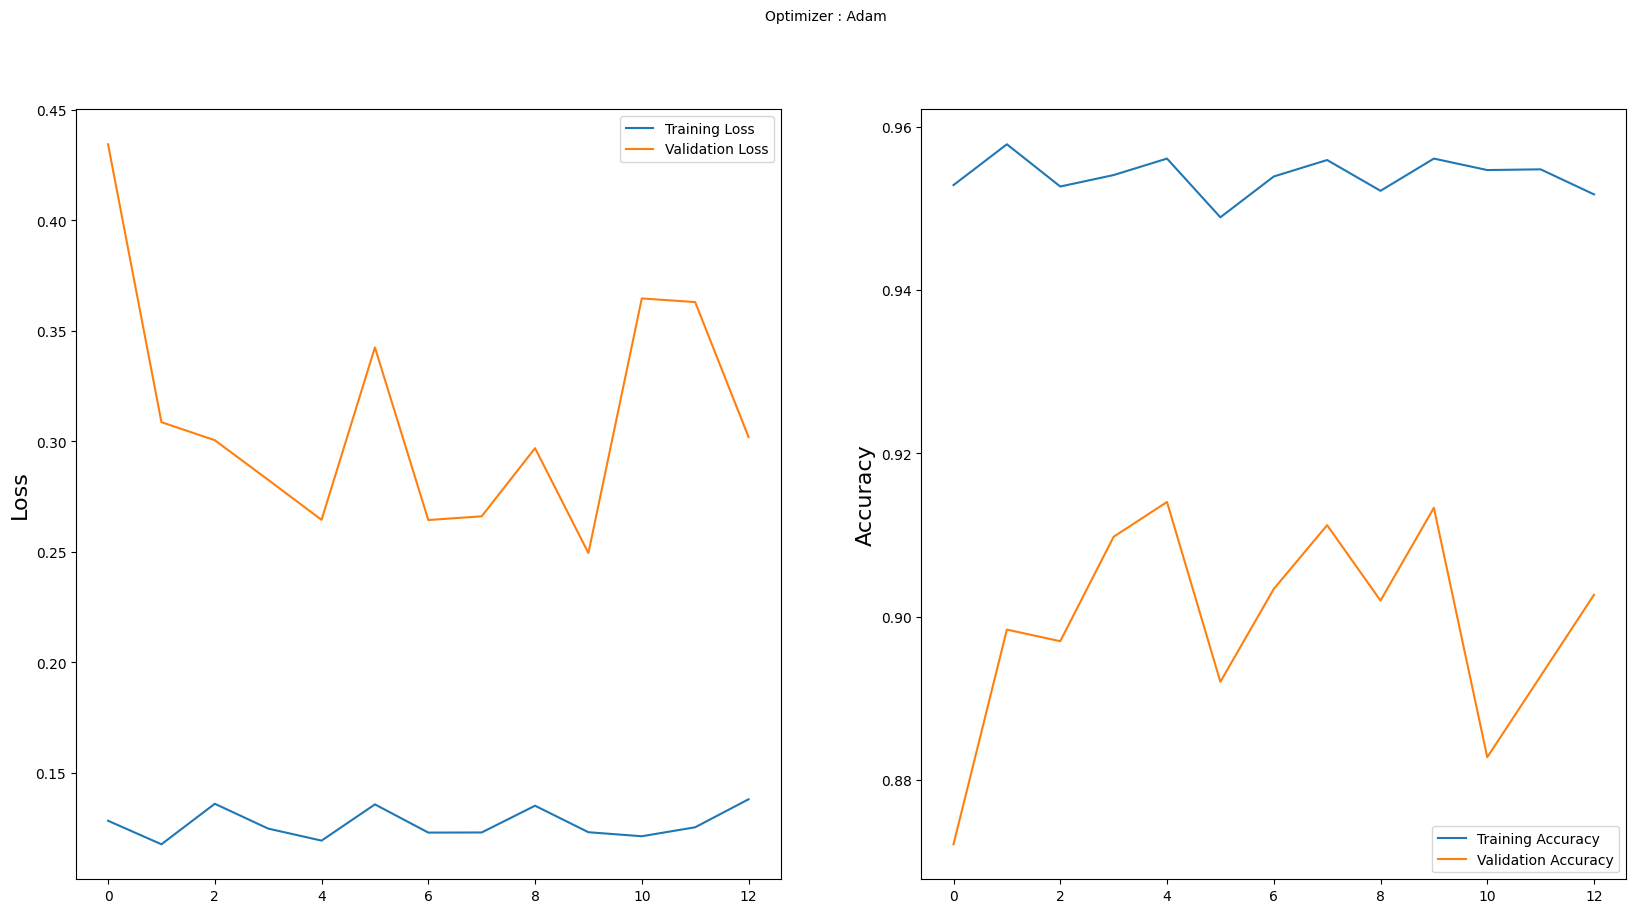

In [66]:
#PLotting Accuracy & Loss
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
           
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy' ], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()